### Creating Visual Graphs to see the patterns

In [15]:
#Dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps
import gmaps.datasets
import ipywidgets as widgets

In [16]:
#path to files
hp_and_rent = "Data/hp_and_rent_grouped.csv"
hp_and_rent_df = pd.read_csv(hp_and_rent, encoding='utf8', engine='python')
hp_and_rent_df.head()

,Neighborhood,Assessed Land Value,Yearly Rent Price,Lat,Lng
0,Bayview,190512.858289,35644.333333,37.730416,-122.384424
1,Bernal Heights,268491.454817,43599.666667,37.738950,-122.415201
2,Buena Vista,487987.841867,53112.333333,37.806505,-122.420778
3,Corona Heights,394108.123417,52034.000000,37.761812,-122.443185
4,Cow Hollow,614482.066967,63147.833333,37.798033,-122.439646


Text(0.5,1,'Average Rent Rate (per Neigborhood)')

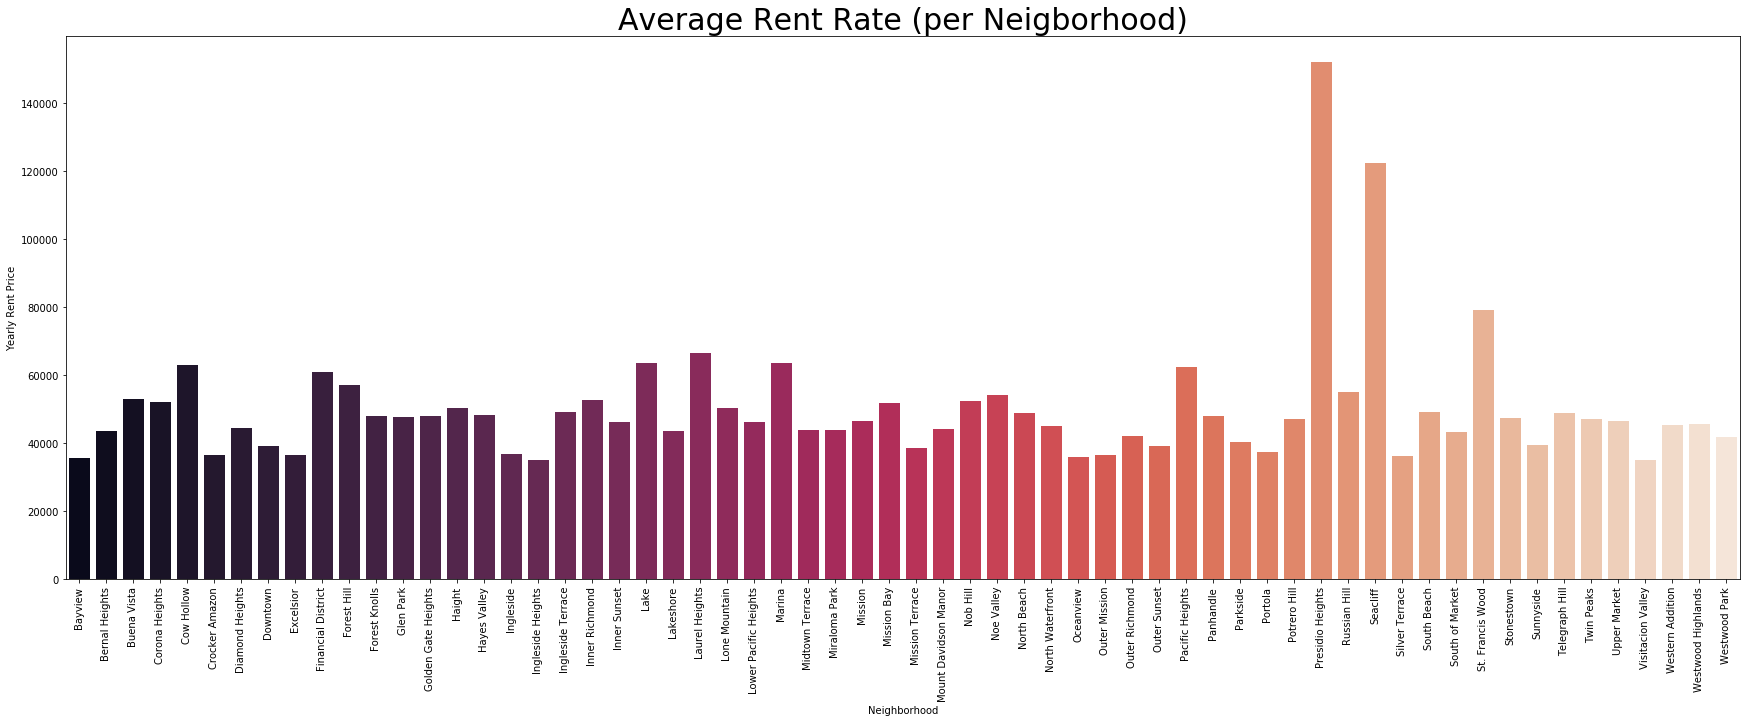

In [17]:
#Using Seaborn to create a graph that will show Average Rent Rate (per Neigborhood)
plot = plt.subplots(figsize=(30, 10))
sns.barplot(x = hp_and_rent_df["Neighborhood"], y = hp_and_rent_df["Yearly Rent Price"], palette="rocket")
plt.xticks(rotation=90)
plt.title("Average Rent Rate (per Neigborhood)", fontsize=30)


[]

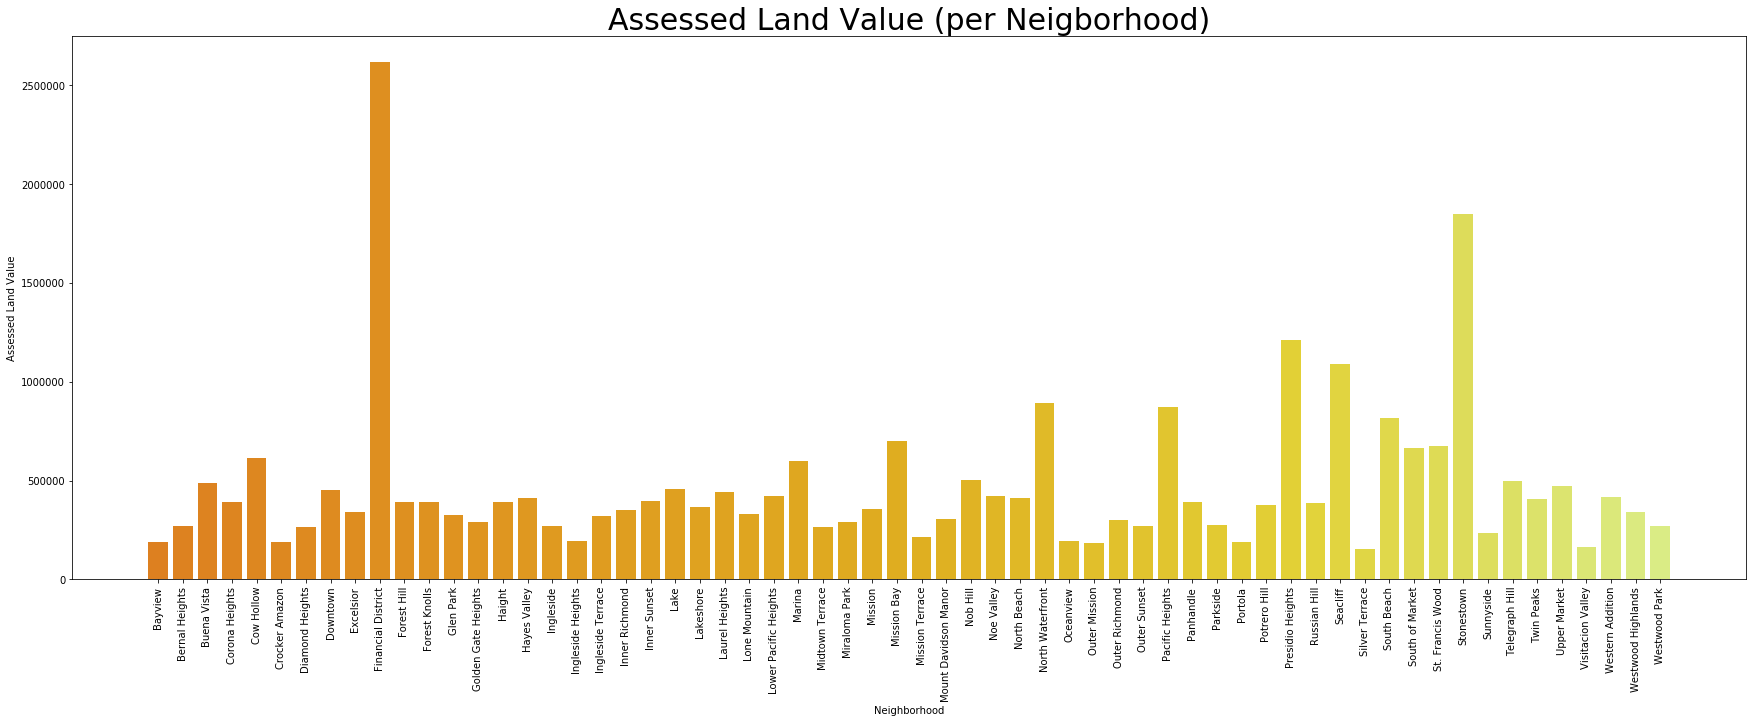

In [18]:
#Using Seaborn to create a graph that will show Assessed Land Value (per Neigborhood)
plot2 = plt.subplots(figsize=(30, 10))
sns.barplot(x = hp_and_rent_df["Neighborhood"], y = hp_and_rent_df["Assessed Land Value"], palette="Wistia_r")
plt.xticks(rotation=90)
plt.title("Assessed Land Value (per Neigborhood)", fontsize=30)
plt.plot()

In [19]:
#Importing csv file 
yearly_price_change_path = "Data/hp_and_rent.csv"
yearly_price_change = pd.read_csv(yearly_price_change_path, encoding='utf8', engine='python')
yearly_price_change.head()

,Unnamed: 0,Neighborhood,Year,Assessed Land Value,Yearly Rent Price,City,Lat,Lng
0,0,Bayview,2011,175691.806133,30723,San Francisco,37.730416,-122.384424
1,1,Bayview,2012,177818.914467,28821,San Francisco,37.730416,-122.384424
2,2,Bayview,2013,182203.741400,30433,San Francisco,37.730416,-122.384424
3,3,Bayview,2014,185691.451367,35338,San Francisco,37.730416,-122.384424
4,4,Bayview,2015,198571.039233,42870,San Francisco,37.730416,-122.384424


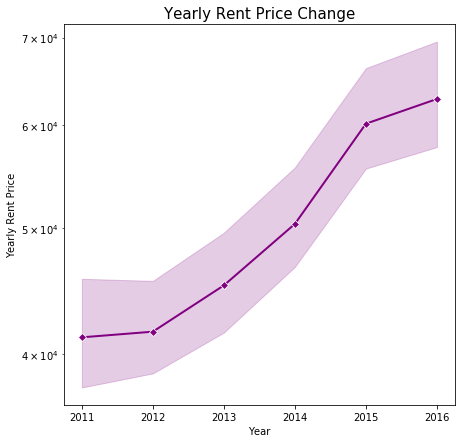

In [20]:
#Creating a graph that will show yearly change in  rent price 
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.lineplot(x = yearly_price_change["Year"], y = yearly_price_change["Yearly Rent Price"], 
             marker ='D', linewidth=2, color = "purple")
plt.title("Yearly Rent Price Change", fontsize=15)
plt.show()


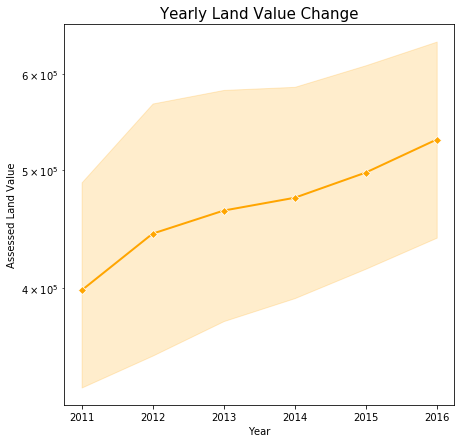

In [21]:
#Creating a graph that will show yearly change in Land Value
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.lineplot(x = yearly_price_change["Year"], y = yearly_price_change["Assessed Land Value"], 
             marker ='D', linewidth=2, color = "Orange")
plt.title("Yearly Land Value Change", fontsize=15)
plt.show()

### HeatMap

In [24]:
#Creating a HeatMap to show Neighborhoods Rent Rates  
fig = gmaps.figure()
locations = hp_and_rent_df[["Lat", "Lng"]]
weights2 = hp_and_rent_df["Yearly Rent Price"]
heat_layer = gmaps.heatmap_layer(locations, weights=weights2, 
                                 point_radius = 25, opacity = 0.7)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
#Creating a HeatMap to show Neighborhoods Assessed Land Value
fig = gmaps.figure()
locations = hp_and_rent_df[["Lat", "Lng"]]
weights = hp_and_rent_df["Assessed Land Value"]
heat_layer1 = gmaps.heatmap_layer(locations, weights=weights, point_radius = 15, 
                                  gradient = ["silver","navy"], opacity = 0.5)                                
fig.add_layer(heat_layer1)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
#Combining two HeatMaps
fig = gmaps.figure()
fig = gmaps.figure(map_type="SATELLITE")
fig.add_layer(heat_layer)
fig.add_layer(heat_layer1)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
new = pd.DataFrame({"Neighborhood": yearly_price_change["Neighborhood"],
                    "Year": yearly_price_change["Year"],
                    "Assessed Land Value" : yearly_price_change["Assessed Land Value"],
                    "Yearly Rent Price": yearly_price_change["Yearly Rent Price"]})
new.head()

,Neighborhood,Year,Assessed Land Value,Yearly Rent Price
0,Bayview,2011,175691.806133,30723
1,Bayview,2012,177818.914467,28821
2,Bayview,2013,182203.741400,30433
3,Bayview,2014,185691.451367,35338
4,Bayview,2015,198571.039233,42870


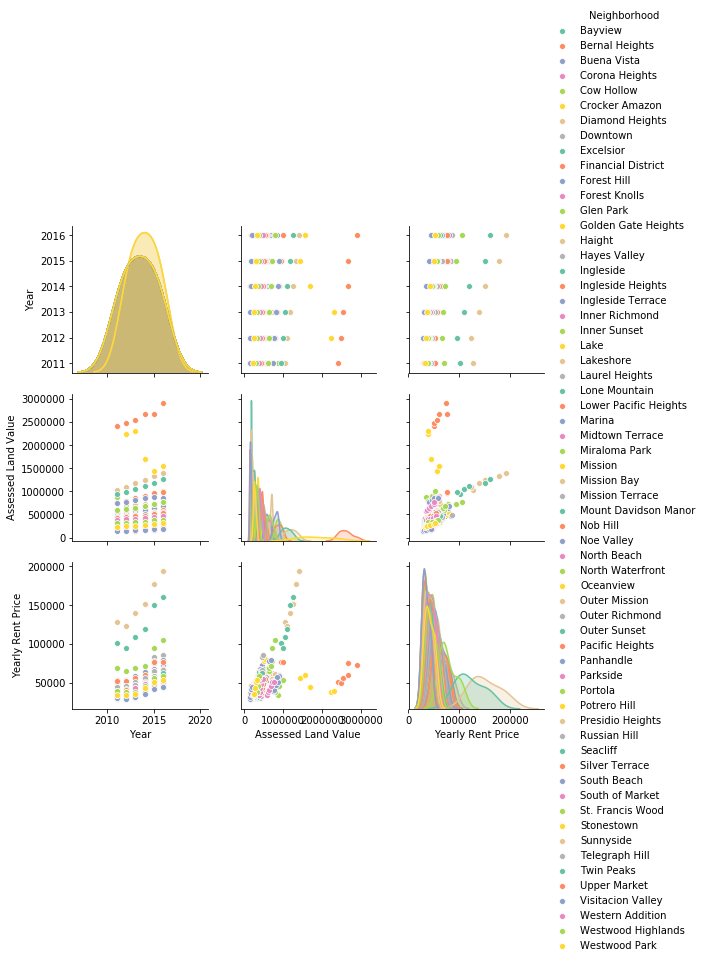

In [12]:
g = sns.pairplot(new, hue="Neighborhood", palette="Set2", diag_kind="kde", height=2.5)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


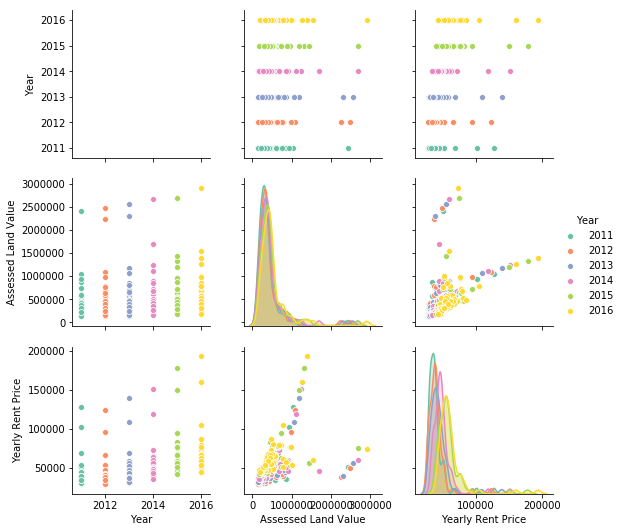

In [13]:
g = sns.pairplot(new, hue="Year", palette="Set2", diag_kind="kde", height=2.5)

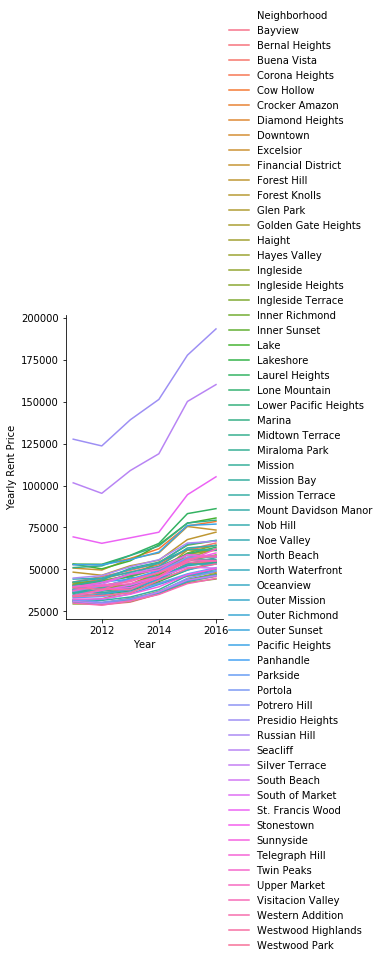

In [14]:

sns.relplot(x="Year", y="Yearly Rent Price",
            hue="Neighborhood", size=None, col=None,
            size_order=["T1", "T2"], palette="husl",
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=new)